In [2]:
import importlib
import pandas as pd
import analysis_functions as af
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from scipy.signal import savgol_filter
from scipy import stats
from scipy.io import loadmat
from scipy.ndimage import uniform_filter1d
import os
import pickle
from matplotlib.animation import FuncAnimation
from scipy.ndimage import gaussian_filter1d
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon

In [99]:
desktop_path = os.path.expanduser(r"C:\Users\HAOXUAN YIN\Desktop\behv data\v1_ctldata.pkl")
with open(desktop_path, 'rb') as f:
    data_ctl = pickle.load(f)

In [121]:
ani = 0
data_ctl[ani]['reward_indices'][:,19]

array([  553,   719,   880,  1051,  1222,  1408,  1583,  1808,  2021,
        2234,  2411,  2602,  2852,  3487,  3651,  3819,  3991,  4182,
        4344,  4503,  4664,  4838,  5012,  5192,  5374,  5558,  5767,
        5965,  6166,  6449,  6702,  6896,  7194,  7447,  7658,  7848,
        8057,  8352,  8557,  8762,  8976,  9253,  9463, 10849, 11161,
       11449, 11672, 11880, 12117, 12447, 12695, 12973, 13268, 13512,
       13834, 14135, 14346, 14647, 14861, 15116, 15501, 15835, 16113,
       16433, 16711, 17647, 18356, 18660, 18944, 19192, 19455, 19713,
       19986, 20245, 20506, 20737, 20968, 21178, 21437, 21684, 21937,
       22170, 22493, 22770, 23014, 23245, 23503, 23815, 24077, 24422,
       24723, 25075, 25325, 25615, 25905, 26184, 26471, 26668, 26856,
       27069, 27266, 27478, 27761, 28018, 28233, 28505, 28821, 30024,
       30392, 30640, 30925, 31188, 31426, 31790, 32091, 32591, 32849,
       33162, 33450, 33738, 34036, 34357, 34635, 34936, 35211, 35482,
       35724, 36032,

In [123]:
ani = 1
data_ctl[ani]['real_position'][data_ctl[ani]['grating_indices']['gr_2']][:,19]

array([3.67469593, 3.64152698, 3.66893264, 3.65844236, 3.66736546,
       3.66971928, 3.64008067, 3.67225738, 3.67617674, 3.68147167,
       3.68066511, 3.65663008, 3.68169323, 3.6787209 , 3.68036638,
       3.68503149, 3.66285356, 3.67021716, 3.68857139, 3.64123074,
       3.6821697 , 3.67586059, 3.67988343, 3.67450638, 3.67565645,
       3.68318935, 3.66726168, 3.6832441 , 3.67714684, 3.66610718,
       3.68900454, 3.67888125, 3.6603094 , 3.67676424, 3.68353536,
       3.68492195, 3.67452546, 3.68600171, 3.65901244, 3.66995825,
       3.66653786, 3.68688868, 3.69360244, 3.67117557, 3.67012026,
       3.67522713, 3.68405813, 3.67822552, 3.66771283, 3.68164094,
       3.67173319, 3.66155908, 3.67649786, 3.67379441, 3.67874042,
       3.68367478, 3.65313499, 3.67963974, 3.68294056, 3.65981899,
       3.6591406 , 3.66083054, 3.68198934, 3.66571752, 3.67012505,
       3.67671196, 3.67226592, 3.68086426, 3.68933066, 3.68246493,
       3.68472685, 3.66796677, 3.68673672, 3.66289836, 3.65285

In [89]:
for ani in data_ctl:
    print(ani, data_ctl[ani]['real_position'][data_ctl[ani]['grating_indices']['gr_2'][19]])

0 [2.95883417 2.96018422 2.96850627 2.98428706 3.01468444 3.05223687
 3.09271    3.13728681 3.18633025 3.23518864 3.27952296 3.31949505
 3.35703466 3.39383313 3.43385498 3.47723273 3.52299243 3.57002937
 3.61594591 3.6587635  3.69614907 3.72283441 3.74786854 3.77369589
 3.79844917 3.8227492  3.84794923 3.8731841  3.89758753 3.92268548
 3.94782576 3.973795   3.99927383 4.02494186 4.05056332 4.07560328
 4.10031036 4.12505386 4.15079501 4.182806   4.20890574 4.2173835
 4.2155065  4.21943324 4.23562318 4.26647655 4.30358155 4.34444894
 4.38664144 4.43116162 4.4735108  4.50750326 4.53370644 4.55863012
 4.57861485 4.59359777 4.60197269 4.6182084  4.63318266 4.64466054]
1 [3.00511024 3.02762756 3.05465904 3.08335173 3.11362423 3.1441899
 3.17395052 3.20197294 3.23289675 3.26711586 3.30204003 3.33872806
 3.37914076 3.42184033 3.46215184 3.49910428 3.53415198 3.56624797
 3.6011168  3.64123074 3.68445146 3.7177171  3.74263929 3.76737782
 3.792899   3.81779203 3.84227094 3.86709757 3.89201332 3.9

In [90]:
reward_trigger_ctl_ds = loadmat(r"C:\Users\HAOXUAN YIN\Desktop\behv data\downsampled_rewardtrigger_ctl.mat")
for ani in data_ctl:
    del data_ctl[ani]['reward_indices']
    data_ctl[ani]['reward_indices'] = np.squeeze(reward_trigger_ctl_ds['downsampled_rewardtrigger_ctl'][0][ani])

In [93]:
ani = 0
data_ctl[ani]['reward_indices']

array([  561,   725,   888,  1063,  1233,  1417,  1591,  1815,  2028,
        2244,  2420,  2608,  2859,  3498,  3663,  3829,  4000,  4191,
        4354,  4511,  4672,  4847,  5022,  5205,  5384,  5569,  5777,
        5975,  6180,  6458,  6711,  6907,  7203,  7452,  7665,  7856,
        8064,  8360,  8562,  8772,  8986,  9260,  9472, 10858, 11170,
       11456, 11682, 11892, 12128, 12458, 12711, 12980, 13279, 13520,
       13842, 14145, 14357, 14655, 14869, 15126, 15509, 15842, 16120,
       16441, 16719, 17658, 18365, 18670, 18955, 19200, 19462, 19720,
       19995, 20252, 20513, 20747, 20977, 21188, 21448, 21691, 21943,
       22180, 22503, 22781, 23022, 23255, 23513, 23826, 24084, 24429,
       24731, 25082, 25334, 25625, 25914, 26190, 26483, 26679, 26863,
       27076, 27273, 27490, 27770, 28028, 28240, 28515, 28831, 30034,
       30402, 30649, 30937, 31195, 31437, 31799, 32104, 32598, 32859,
       33172, 33459, 33750, 34045, 34366, 34642, 34946, 35219, 35490,
       35731, 36038,

In [ ]:
# Load the ctl data
desktop_path = os.path.expanduser(r"C:\Users\HAOXUAN YIN\Desktop\behv data\v1ctldata_full.pkl")
with open(desktop_path, 'rb') as f:
    data_ctl_full = pickle.load(f)
    data_ctl_full.pop(5)
    data_ctl_full.pop(0)
    
desktop_path = os.path.expanduser(r"C:\Users\HAOXUAN YIN\Desktop\behv data\v1_ctldata.pkl")
with open(desktop_path, 'rb') as f:
    data_ctl = pickle.load(f)
    data_ctl.pop(5)
    data_ctl.pop(0)

# process the speed and pupil data
for ani in data_ctl:
    data_ctl[ani]['speed'] = data_ctl[ani]['speed'] - np.percentile(data_ctl[ani]['speed'], 10)  # speed - percentile(speed)



time_ctl = loadmat(r"C:\Users\HAOXUAN YIN\Desktop\behv data\time_ctldata.mat")
time_full_ctl = loadmat(r"C:\Users\HAOXUAN YIN\Desktop\behv data\time_ctldata_full.mat")
for ani in data_ctl:
    data_ctl[ani]['time'] = np.squeeze(time_ctl['time'][0][ani])
for ani in data_ctl_full:
    data_ctl_full[ani]['time'] = np.squeeze(time_full_ctl['t'][0][ani])

reward_trigger_ctl = loadmat(r"C:\Users\HAOXUAN YIN\Desktop\behv data\rewardtrigger_ctl.mat")
for ani in data_ctl_full:
    del data_ctl_full[ani]['reward_indices']
    data_ctl_full[ani]['reward_indices'] = np.squeeze(reward_trigger_ctl['rewardtrigger_ctl'][0][ani])

reward_trigger_ctl_ds = loadmat(r"C:\Users\HAOXUAN YIN\Desktop\behv data\downsampled_rewardtrigger_ctl.mat")
for ani in data_ctl:
    del data_ctl[ani]['reward_indices']
    data_ctl[ani]['reward_indices'] = np.squeeze(reward_trigger_ctl_ds['downsampled_rewardtrigger_ctl'][0][ani])

# Load the tst data 
desktop_path = os.path.expanduser(r"C:\Users\HAOXUAN YIN\Desktop\behv data\v1tstdata_full.pkl")
with open(desktop_path, 'rb') as f:
    data_tst_full = pickle.load(f)
    data_tst_full.pop(11)
    data_tst_full.pop(13)
    
    
desktop_path = os.path.expanduser(r"C:\Users\HAOXUAN YIN\Desktop\behv data\v1_tstdata.pkl")
with open(desktop_path, 'rb') as f:
    data_tst = pickle.load(f)
    data_tst.pop(11)
    data_tst.pop(13) # no speed and lick data in this animal

# process the speed and pupil data
for ani in data_tst:
    data_tst[ani]['speed'] = data_tst[ani]['speed'] - np.percentile(data_tst[ani]['speed'], 10)  # speed - percentile(speed)

    # trunc_pos = np.floor(data_tst[ani]['real_position'] * 10) / 10
    # rew_trigger = np.where((trunc_pos[:-1] != 4.6) & (trunc_pos[1:] == 4.6))[0] + 1
    # data_tst[ani]['reward_indices'] = np.array([np.arange(idx-30, idx+31) for idx in rew_trigger if idx >= 30 and idx < len(trunc_pos)-30])  # set reward indices

time_tst = loadmat(r"C:\Users\HAOXUAN YIN\Desktop\behv data\time_tstdata.mat")
time_full_tst = loadmat(r"C:\Users\HAOXUAN YIN\Desktop\behv data\time_tstdata_full.mat")

for ani in data_tst:
    data_tst[ani]['time'] = np.squeeze(time_tst['time'][0][ani])
for ani in data_tst_full:
    data_tst_full[ani]['time'] = np.squeeze(time_full_tst['time'][0][ani])

reward_trigger_tst = loadmat(r"C:\Users\HAOXUAN YIN\Desktop\behv data\rewardtrigger_tst.mat")
for ani in data_tst_full:
    del data_tst_full[ani]['reward_indices']
    data_tst_full[ani]['reward_indices'] = np.squeeze(reward_trigger_tst['rewardtrigger_tst'][0][ani])

reward_trigger_tst_ds = loadmat(r"C:\Users\HAOXUAN YIN\Desktop\behv data\downsampled_rewardtrigger_tst.mat")
for ani in data_tst:
    del data_tst[ani]['reward_indices']
    data_tst[ani]['reward_indices'] = np.squeeze(reward_trigger_tst_ds['downsampled_rewardtrigger_tst'][0][ani])

In [96]:
for indices in data_ctl[4]['reward_indices']:
    time = data_ctl[4]['time'][indices]
    print(time//60,'min',time-(time//60)*60,'sec')

KeyError: 'time'

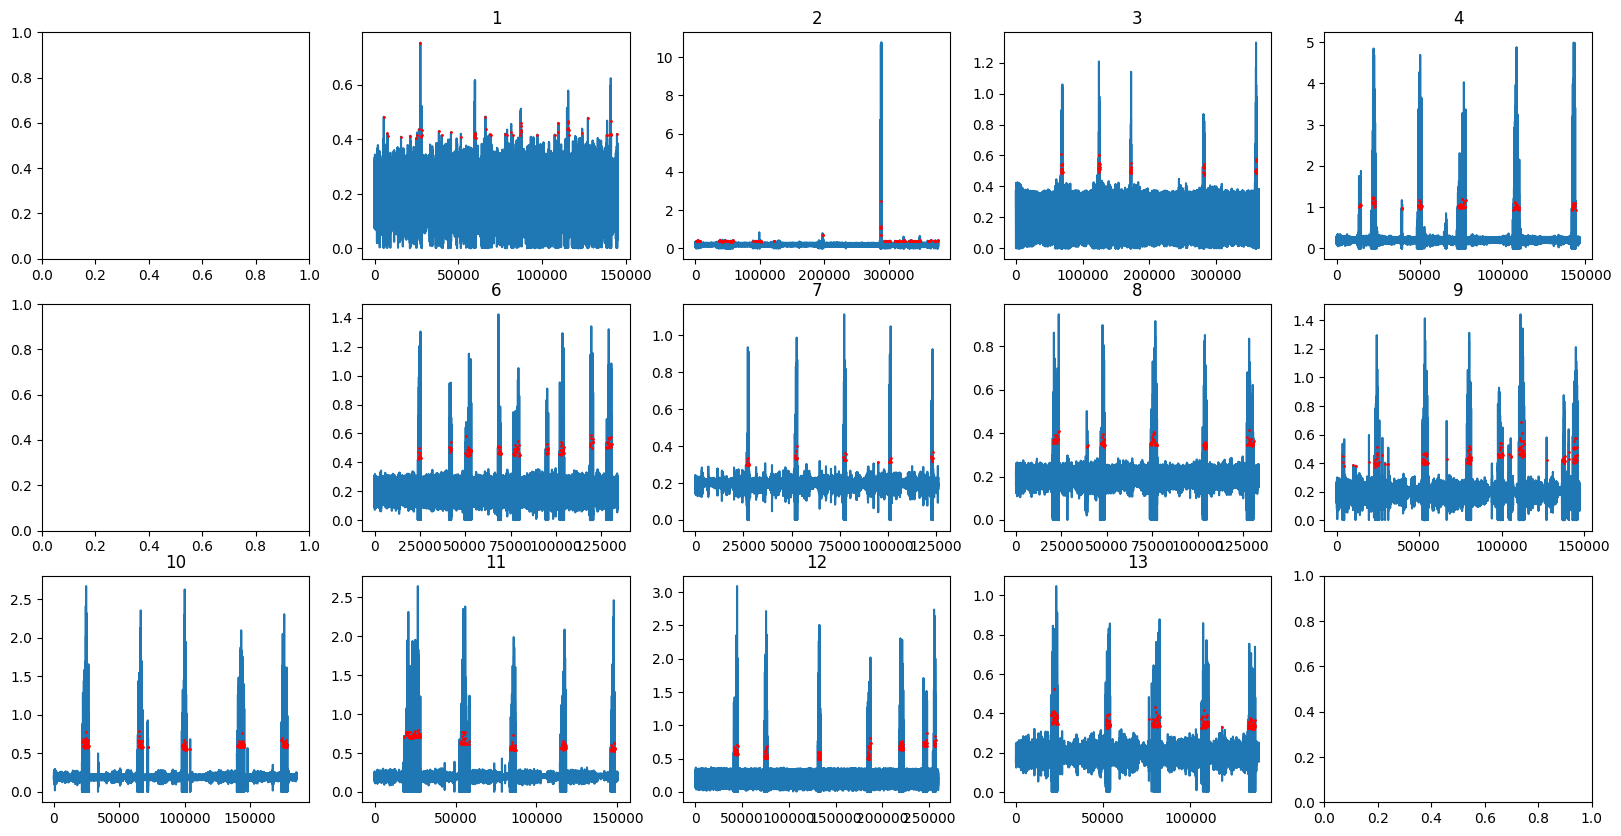

In [39]:
# find lick indices in nondownsampled data and get lick_onsets/lick_records/lick_rate in downsampled data--- ctl

lick_onsets_ctl = {}
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
axes = axes.flatten()

max_valid = 5
min_interval = 100   # refractory period in samples

for ani in data_ctl_full:
    lick_onsets_ctl[ani] = []

    lick_signal_raw = np.clip(data_ctl_full[ani]['lick'], a_min=None, a_max=max_valid)
    lick_signal = gaussian_filter1d(lick_signal_raw, sigma=0.1)  # optional smoothing

    trial_start_indices = data_ctl_full[ani]['trial_start_indices']

    # iterate over all trials
    for tri in range(len(trial_start_indices) - 1):
        start = trial_start_indices[tri]
        end = trial_start_indices[tri + 1]
        segment = lick_signal[start:end]
        
        # compute per-trial threshold
        # threshold = 0.4
        threshold = np.median(segment) + 3 * np.std(segment)

        # find threshold crossings
        above = segment > threshold
        crossings = np.where((~above[:-1]) & (above[1:]))[0] + 1 

        # convert local indices to absolute indices
        if len(crossings) > 0:
            # enforce refractory period (in absolute frame)
            abs_cross = start + crossings
            if len(abs_cross) > 0:
                filtered = [abs_cross[0]]
                for idx in abs_cross[1:]:
                    if idx - filtered[-1] >= min_interval:
                        filtered.append(idx)
                lick_onsets_ctl[ani].extend(filtered)

# convert to numpy arrays and visualise 
for ani in lick_onsets_ctl:
    lick_onsets_ctl[ani] = np.array(lick_onsets_ctl[ani])

    trial_start_indices = data_ctl_full[ani]['trial_start_indices']
    start, end = trial_start_indices[15], trial_start_indices[20]
    lick_signal = data_ctl_full[ani]['lick'] 
    axes[ani].plot(lick_signal[start:end])
    axes[ani].set_title(f'{ani}')
    # axes[ani].axhline(0.2,c='red')

    onsets_in_segment = lick_onsets_ctl[ani][
        (lick_onsets_ctl[ani] >= start) & (lick_onsets_ctl[ani] < end)
    ]
    rel_onsets = onsets_in_segment - start
    axes[ani].scatter(
        rel_onsets,
        lick_signal[onsets_in_segment],
        color='red', s=1, zorder=3
    )


# Calculate the Lick Rate
lick_rate_ctl = {}
window_ms = 200  # 1-second sliding window
sampling_rate = 1000  # Hz
for ani in data_ctl_full:
    # Make binary lick signal
    n_samples = len(data_ctl_full[ani]['time'])
    lick_signal = np.zeros(n_samples)
    lick_signal[lick_onsets_ctl[ani]] = 1
    # Sliding window average (licks per sample)
    rate_per_sample = uniform_filter1d(lick_signal, size=window_ms, mode='constant')
    # Convert to licks per second
    lick_rate_ctl[ani] = rate_per_sample * sampling_rate


# Find the lick indices in the downsampled data and get a new lick_onsets_ctl
lick_onsets_ctl_ds = {}
for ani in data_ctl_full:
    times_full = data_ctl_full[ani]['time']
    times_ds = data_ctl[ani]['time']
    lick_onsets_ctl_ds[ani] = [] 
    for lick_ind in lick_onsets_ctl[ani]:
        lick_time = times_full[lick_ind]
        i = np.argmin(np.abs(times_ds - lick_time))   # find the time_ds closest to lick_time and use that index
        if 0 <= i < len(times_ds): 
            lick_onsets_ctl_ds[ani].append(i)
    lick_onsets_ctl_ds[ani] = np.array(lick_onsets_ctl_ds[ani])


# Get the lick_record
lick_record_ctl = {}
for ani in data_ctl:
    lick_record_ctl[ani] = np.zeros(data_ctl[ani]['lick'].shape[0])
    for num in lick_onsets_ctl_ds[ani]:
        lick_record_ctl[ani][num] = 1


lick_rate_ctl_ds = {}
window_frames = 4
for ani in data_ctl:
    lick_series = pd.Series(lick_record_ctl[ani])
    lick_count = lick_series.rolling(window=window_frames, min_periods=1).sum() 
    lick_rate_ctl_ds[ani] = np.array(lick_count)   # Convert to licks/sec (since window is 1 sec, no need to change)

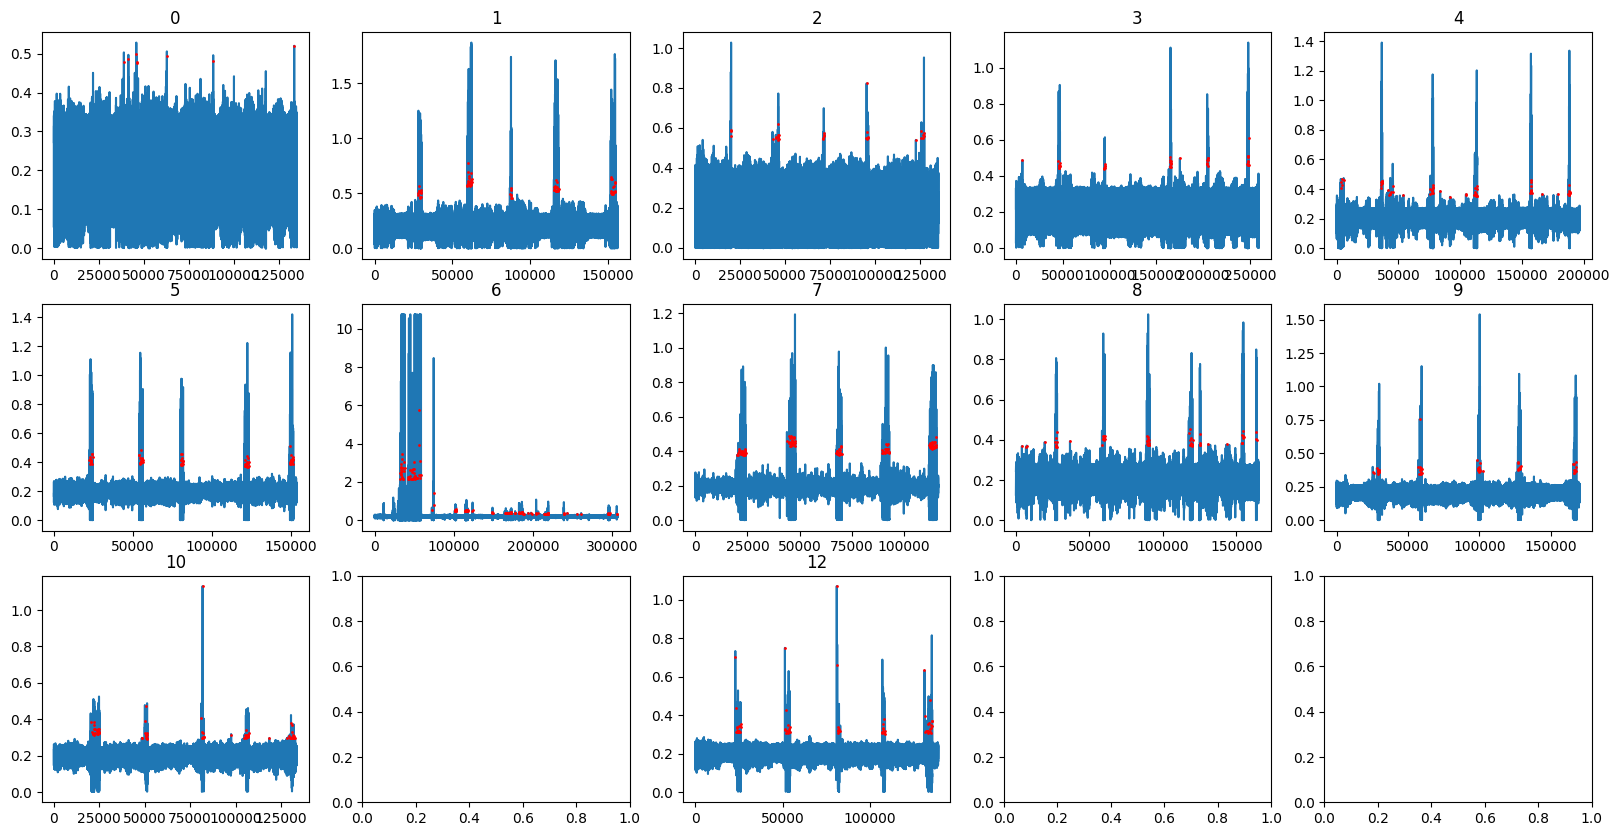

In [40]:
# find lick indices in nondownsampled data and get lick_onsets/lick_records/lick_rate in downsampled data--- tst

lick_onsets_tst = {}
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
axes = axes.flatten()

max_valid = 5
min_interval = 100   # refractory period in samples

for ani in data_tst_full:
    lick_onsets_tst[ani] = []

    lick_signal_raw = np.clip(data_tst_full[ani]['lick'], a_min=None, a_max=max_valid)
    lick_signal = gaussian_filter1d(lick_signal_raw, sigma=0.1)  # optional smoothing

    trial_start_indices = data_tst_full[ani]['trial_start_indices']

    # iterate over all trials
    for tri in range(len(trial_start_indices) - 1):
        start = trial_start_indices[tri]
        end = trial_start_indices[tri + 1]
        segment = lick_signal[start:end]
        
        # threshold = 0.4
        threshold = np.median(segment) + 3 * np.std(segment)

        # find threshold crossings
        above = segment > threshold
        crossings = np.where((~above[:-1]) & (above[1:]))[0] + 1 

        # convert local indices to absolute indices
        if len(crossings) > 0:
            # enforce refractory period (in absolute frame)
            abs_cross = start + crossings
            if len(abs_cross) > 0:
                filtered = [abs_cross[0]]
                for idx in abs_cross[1:]:
                    if idx - filtered[-1] >= min_interval:
                        filtered.append(idx)
                lick_onsets_tst[ani].extend(filtered)

# convert to numpy arrays
for ani in lick_onsets_tst:
    
    lick_onsets_tst[ani] = np.array(lick_onsets_tst[ani])
    
    trial_start_indices = data_tst_full[ani]['trial_start_indices']
    start, end = trial_start_indices[15], trial_start_indices[20]
    lick_signal = data_tst_full[ani]['lick'] 
    axes[ani].plot(lick_signal[start:end])
    axes[ani].set_title(f'{ani}')
    # axes[ani].axhline(0.2,c='red')

    onsets_in_segment = lick_onsets_tst[ani][
        (lick_onsets_tst[ani] >= start) & (lick_onsets_tst[ani] < end)
    ]
    rel_onsets = onsets_in_segment - start
    axes[ani].scatter(
        rel_onsets,
        lick_signal[onsets_in_segment],
        color='red', s=1, zorder=3
    )

# Calculate the Lick Rate

lick_rate_tst = {}
window_ms = 200  # 1-second sliding window
sampling_rate = 1000  # Hz
for ani in data_tst_full:
    # Make binary lick signal
    n_samples = len(data_tst_full[ani]['time'])
    lick_signal = np.zeros(n_samples)
    lick_signal[lick_onsets_tst[ani]] = 1
    # Sliding window average (licks per sample)
    rate_per_sample = uniform_filter1d(lick_signal, size=window_ms, mode='constant')
    # Convert to licks per second
    lick_rate_tst[ani] = rate_per_sample * sampling_rate


# Find the lick indices in the downsampled data and get a new lick_onsets_tst

lick_onsets_tst_ds = {}
for ani in data_tst_full:
    times_full = data_tst_full[ani]['time']
    times_ds = data_tst[ani]['time']
    lick_onsets_tst_ds[ani] = [] 
    for lick_ind in lick_onsets_tst[ani]:
        lick_time = times_full[lick_ind]
        i = np.argmin(np.abs(times_ds - lick_time))   # find the time_ds closest to lick_time and use that index
        if 0 <= i < len(times_ds): 
            lick_onsets_tst_ds[ani].append(i)
    lick_onsets_tst_ds[ani] = np.array(lick_onsets_tst_ds[ani])


# Get the lick_record

lick_record_tst = {}
for ani in data_tst:
    lick_record_tst[ani] = np.zeros(data_tst[ani]['lick'].shape[0])
    for num in lick_onsets_tst_ds[ani]:
        lick_record_tst[ani][num] = 1


lick_rate_tst_ds = {}
window_frames = 4
for ani in data_tst:
    lick_series = pd.Series(lick_record_tst[ani])
    lick_count = lick_series.rolling(window=window_frames, min_periods=1).sum() 
    lick_rate_tst_ds[ani] = np.array(lick_count)   # Convert to licks/sec (since window is 1 sec, no need to change)

TODO

1. change the reward and grating indices in downsampled data done
2. load the time stamps and align indices based on the time stamps  done
3. calculate the lick rate using the nondownsampled lick onsets  done
4. concatenate the lick file and should be all good  done   --- the result emmmmmm,,,,,,
OK it's the threshold, the threshold is fucked up, but the indices should be good now
checked threshold,,, not positive,,,,, 


/////////////////


1. Plot lick with full data
2. 

In [62]:
def plot_lick_data(ani):  # function that plot lick raster
    ani_positions = data_ctl[ani]['real_position'] * 700/5
    aligned_exp = []
    aligned_unexp = []
    for i, trial_start in enumerate(data_ctl[ani]['trial_start_indices']):   # i is the trial number and trial_start is the index
        if i < len(data_ctl[ani]['trial_start_indices']) - 1:   
            trial_end = data_ctl[ani]['trial_start_indices'][i+1]   
        else:
            trial_end = len(data_ctl[ani]['real_position'])
        for num, lick in enumerate(lick_record_ctl[ani][trial_start:trial_end]):   # num is the index in [trial_start:trial_end]
            if lick == 1 and i in data_ctl[ani]['unpred_trials']['gr_2']:
                aligned_unexp.append([i,ani_positions[trial_start:trial_end][num]])
            if lick == 1 and i in data_ctl[ani]['pred_trials']:
                aligned_exp.append([i,ani_positions[trial_start:trial_end][num]])
    aligned_exp = np.array(aligned_exp)
    aligned_unexp = np.array(aligned_unexp)

    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    axes[0].scatter(aligned_unexp[:, 1], aligned_unexp[:, 0], s=5, c='purple')
    axes[0].scatter(aligned_exp[:, 1], aligned_exp[:, 0], s=5, c='green')
    axes[0].axvline(x=4.6*700/5, color='red', linestyle='-', linewidth=1, label='Reward position')
    # axes[0].axvline(x=3.7*700/5, color='red', linestyle='--', linewidth=1, label='Grating 2 position')
    axes[0].legend(loc='upper left')
    axes[0].set_title('Control')
    axes[0].set_xlabel('Position (cm)')
    axes[0].set_ylabel('Trial number')
    fig.suptitle('')

    ani_positions = data_tst[ani]['real_position'] * 700/5
    aligned_exp = []
    aligned_unexp = []
    for i, trial_start in enumerate(data_tst[ani]['trial_start_indices']):   # i is the trial number and trial_start is the index
        if i < len(data_tst[ani]['trial_start_indices']) - 1:   
            trial_end = data_tst[ani]['trial_start_indices'][i+1]   
        else:
            trial_end = len(data_tst[ani]['real_position'])
        for num, lick in enumerate(lick_record_tst[ani][trial_start:trial_end]):   # num is the index
            if lick == 1 and i in data_tst[ani]['unpred_trials']['gr_2']:
                aligned_unexp.append([i,ani_positions[trial_start:trial_end][num]])
            if lick == 1 and i in data_tst[ani]['pred_trials']:
                aligned_exp.append([i,ani_positions[trial_start:trial_end][num]])
    aligned_exp = np.array(aligned_exp)
    aligned_unexp = np.array(aligned_unexp)

    axes[1].scatter(aligned_unexp[:, 1], aligned_unexp[:, 0], s=5, c='purple')
    axes[1].scatter(aligned_exp[:, 1], aligned_exp[:, 0], s=5, c='green')
    axes[1].axvline(x=4.6*700/5, color='red', linestyle='-', linewidth=1, label='Reward position')
    # axes[1].axvline(x=3.7*700/5, color='red', linestyle='--', linewidth=1, label='Grating 2 position')
    axes[1].legend(loc='upper left')
    axes[1].set_title('Test')
    axes[1].set_xlabel('Position (cm)')
    plt.tight_layout()
    plt.show()

In [9]:
def plot_one_ani(this_ani,dataset,this_trial):
    
    dataset = dataset
    lick_onsets_ctl = {}
    
    fig, axes = plt.subplots(figsize=(20, 10))

    max_valid = 5
    min_interval = 100   # refractory period in samples

    for ani in dataset:
        lick_onsets_ctl[ani] = []

        lick_signal_raw = np.clip(dataset[ani]['lick'], a_min=None, a_max=max_valid)
        lick_signal = gaussian_filter1d(lick_signal_raw, sigma=0.1)  # optional smoothing

        trial_start_indices = dataset[ani]['trial_start_indices']

        # iterate over all trials
        for tri in range(len(trial_start_indices) - 1):
            start = trial_start_indices[tri]
            end = trial_start_indices[tri + 1]
            segment = lick_signal[start:end]

            # lower, upper = np.percentile(segment, [20, 80]) 
            # clipped = segment[(segment > lower) & (segment < upper)]
            # threshold = np.median(clipped) + 5 * np.std(clipped)
            # print(threshold)

            # compute per-trial threshold
            threshold = np.median(segment) + 3 * np.std(segment)

            # find threshold crossings
            above = segment > threshold
            crossings = np.where((~above[:-1]) & (above[1:]))[0] + 1 

            # convert local indices to absolute indices
            if len(crossings) > 0:
                # enforce refractory period (in absolute frame)
                abs_cross = start + crossings
                if len(abs_cross) > 0:
                    filtered = [abs_cross[0]]
                    for idx in abs_cross[1:]:
                        if idx - filtered[-1] >= min_interval:
                            filtered.append(idx)
                    lick_onsets_ctl[ani].extend(filtered)

    # convert to numpy arrays for convenience
    ani = this_ani
    lick_onsets_ctl[ani] = np.array(lick_onsets_ctl[ani])

    reward_indices = dataset[ani]['reward_indices']
    trial_start_indices = dataset[ani]['trial_start_indices']

    tri = this_trial

    start, end = trial_start_indices[tri], trial_start_indices[tri+5]
    lick_signal = dataset[ani]['lick'] 

    axes.plot(lick_signal[start:end])
    axes.set_title(f'{ani}')
    axes.set_ylim([0,1])
    # axes.axhline(0.3,c='red')
    axes.axvline(reward_indices[tri+1]-start,c='red')
    axes.axvline(reward_indices[tri+2]-start,c='red')
    axes.axvline(reward_indices[tri+3]-start,c='red')
    axes.axvline(reward_indices[tri+4]-start,c='red')

    onsets_in_segment = lick_onsets_ctl[ani][
        (lick_onsets_ctl[ani] >= start) & (lick_onsets_ctl[ani] < end)
    ]

    rel_onsets = onsets_in_segment - start

    axes.scatter(
        rel_onsets,
        lick_signal[onsets_in_segment],
        color='red', s=3, zorder=3
    )

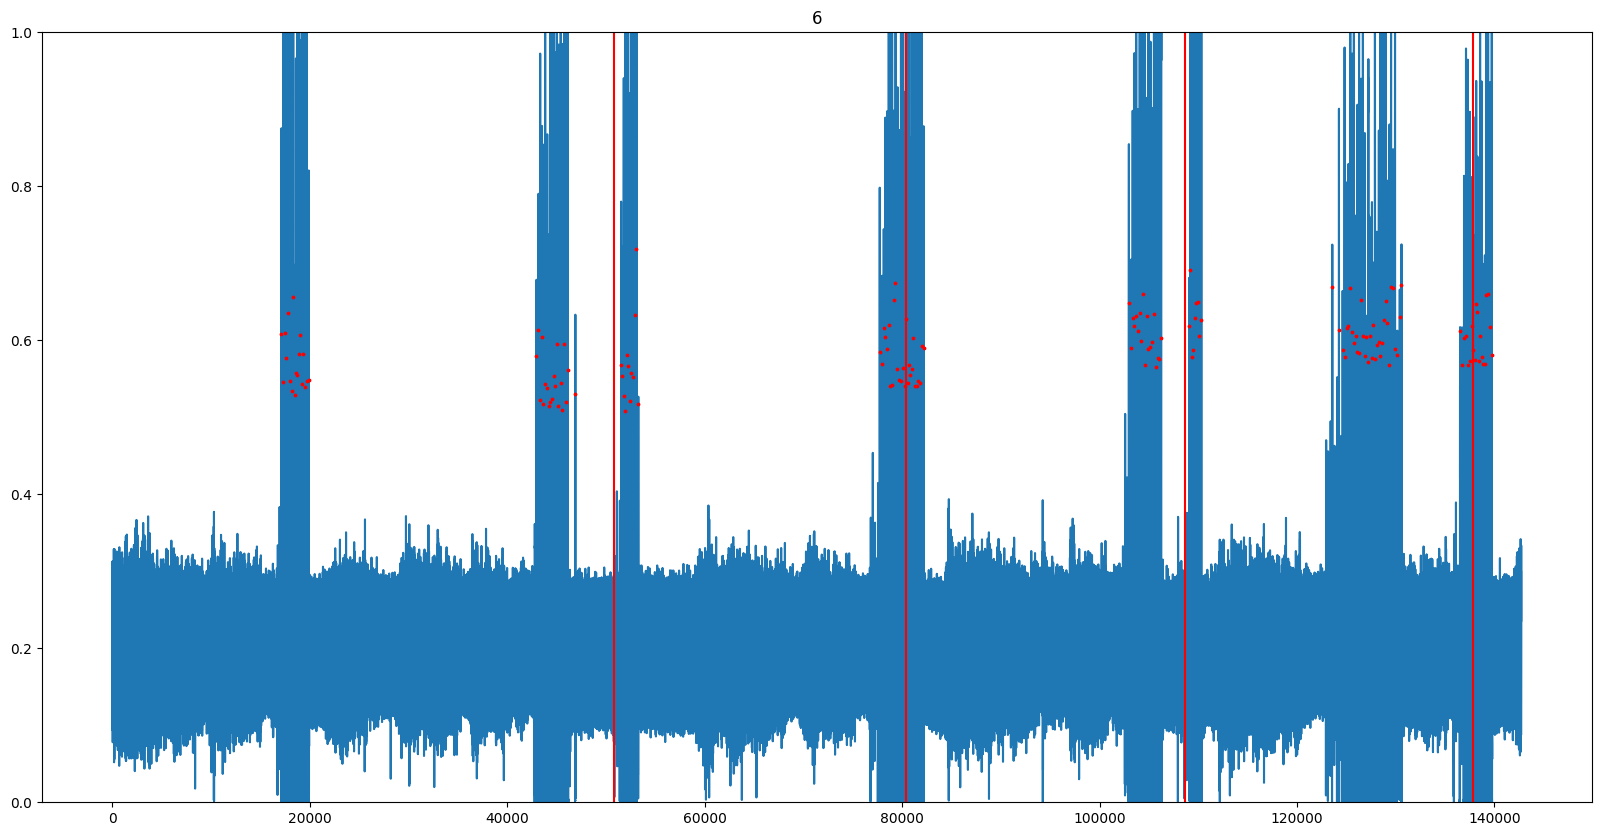

In [226]:
plot_one_ani(6, data_ctl_full, 100)

1


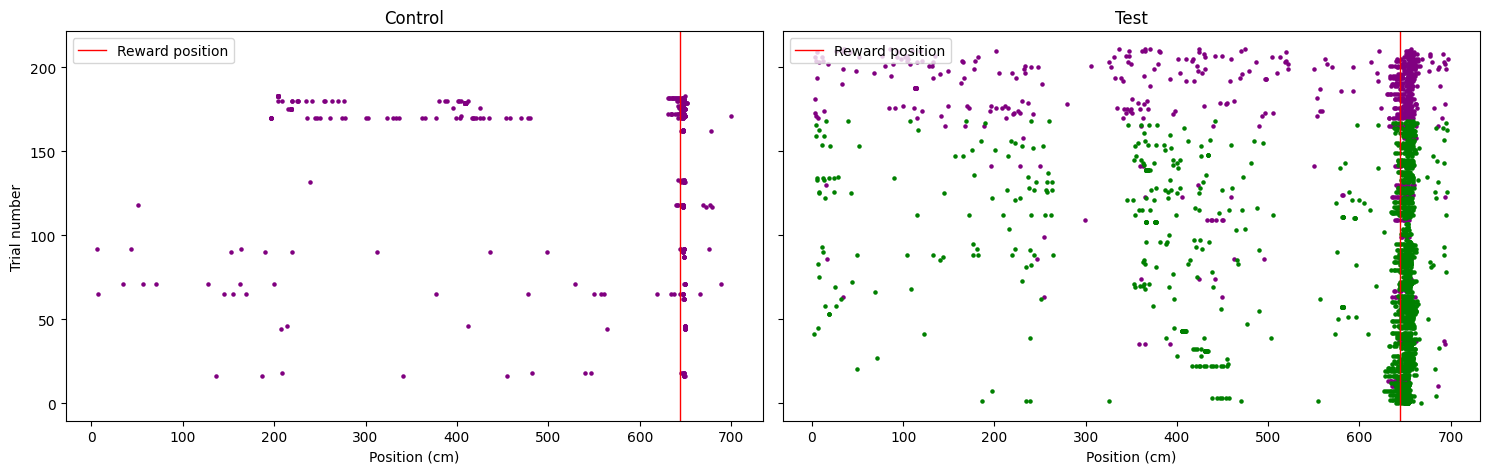

2


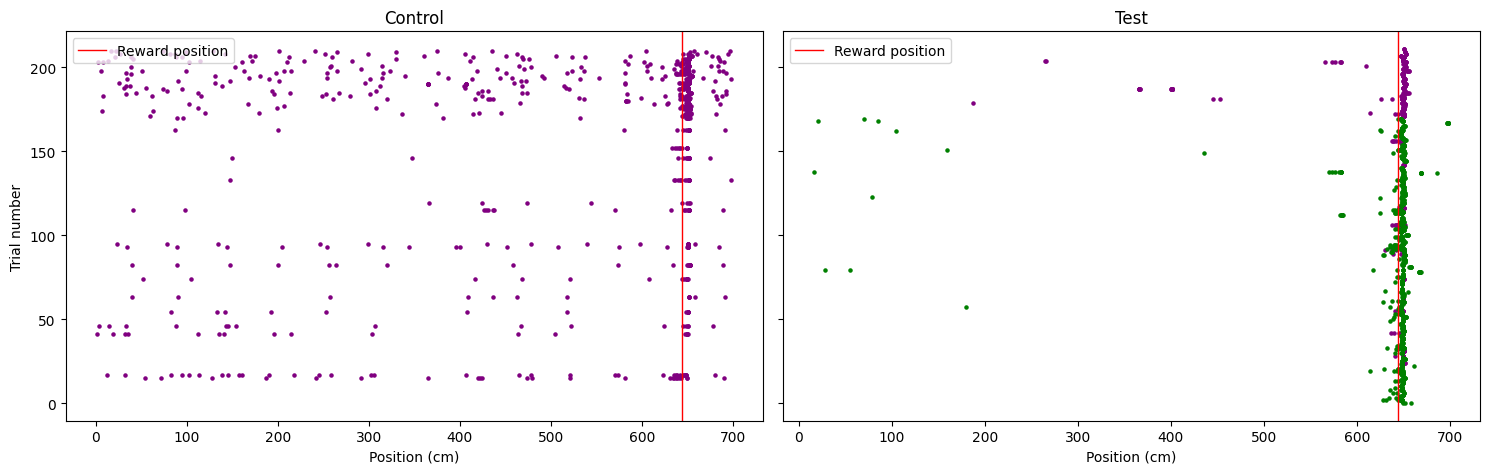

3


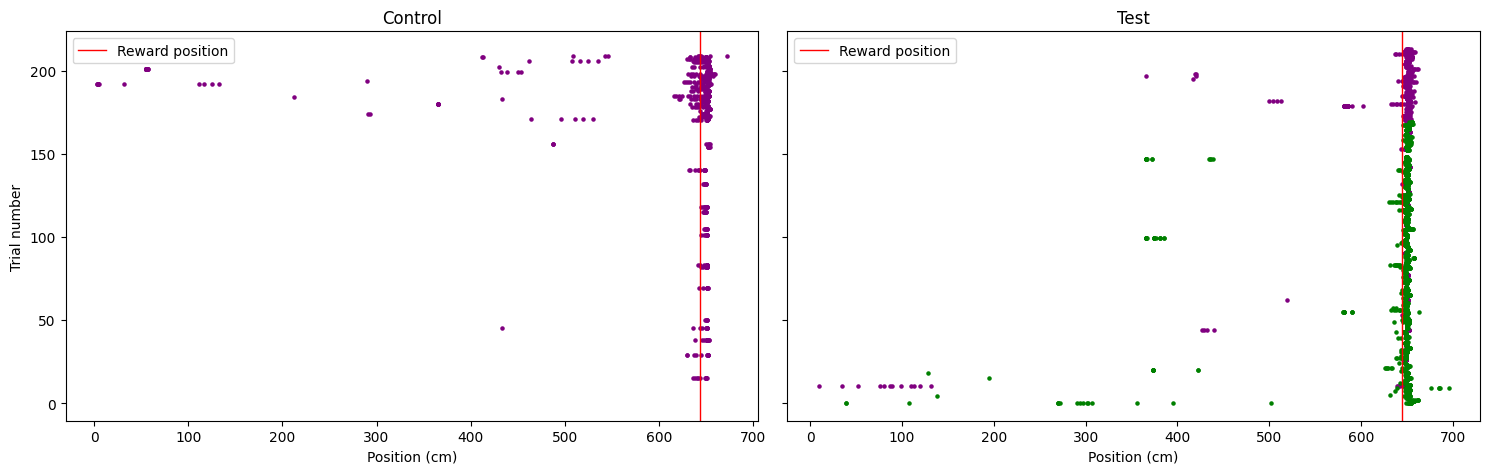

4


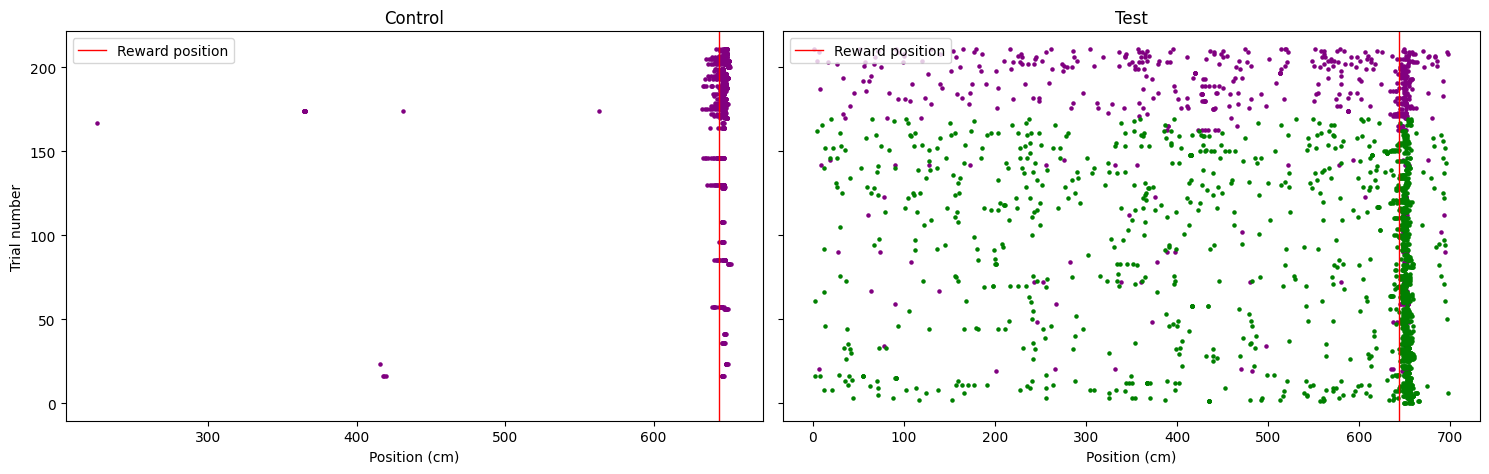

6


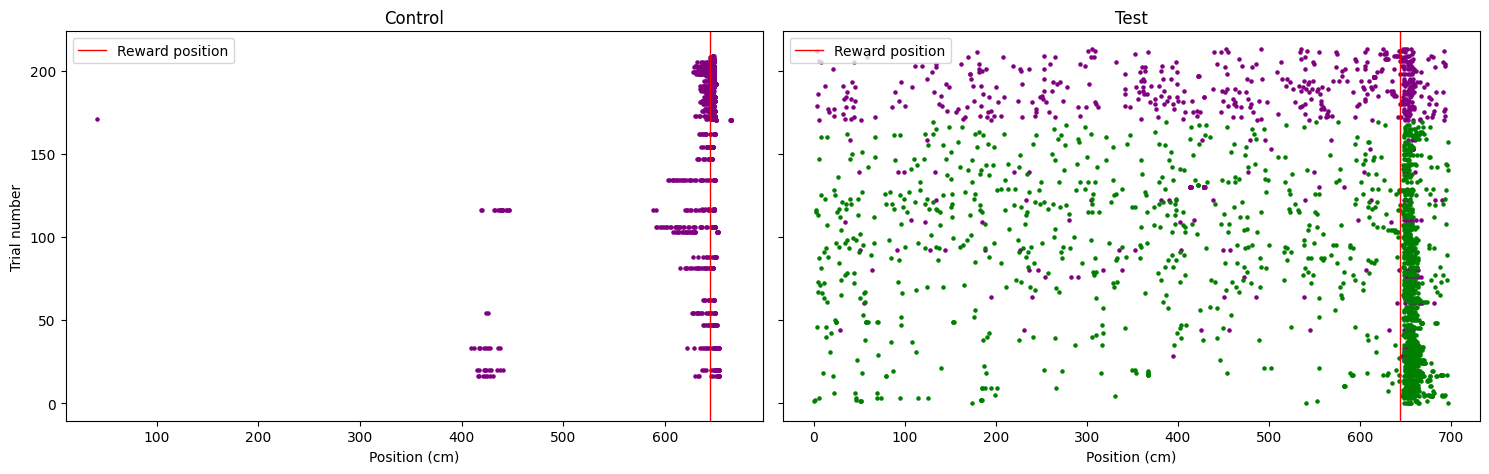

7


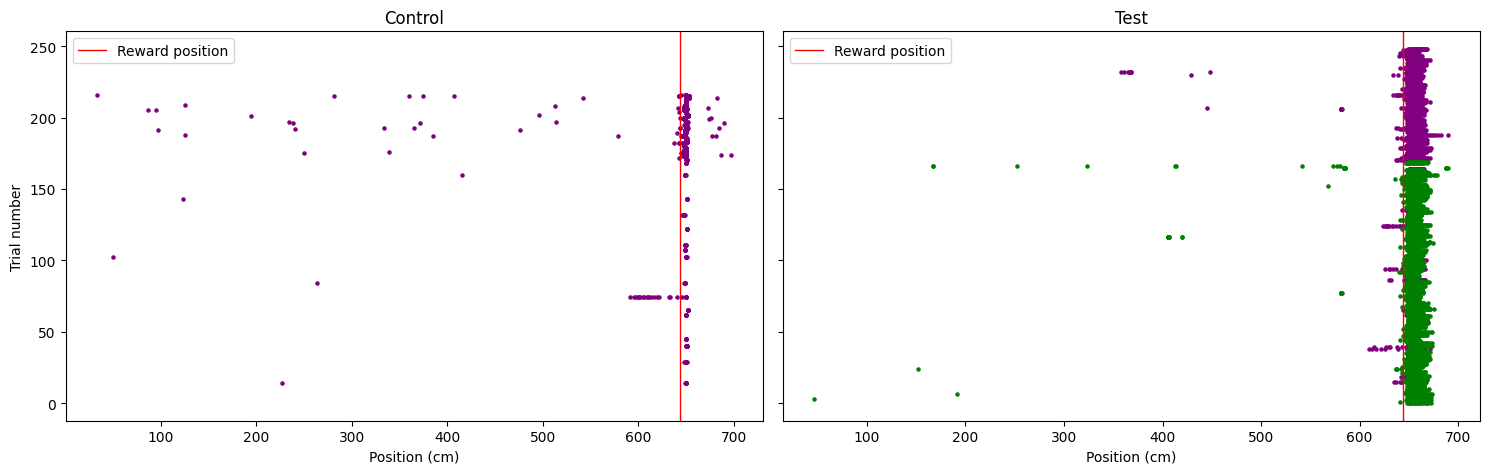

8


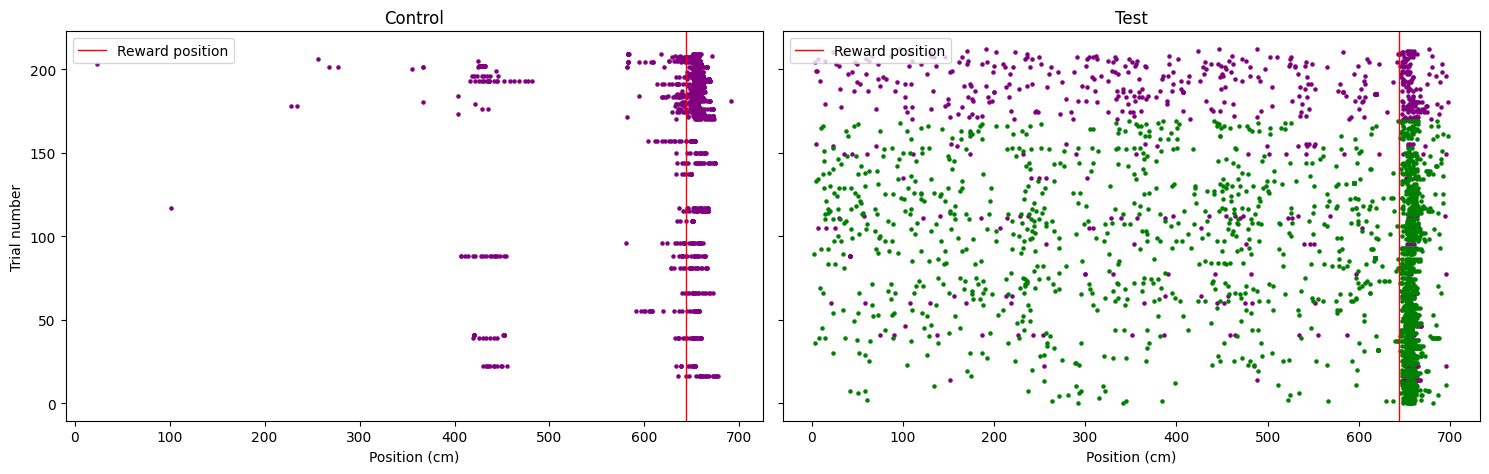

9


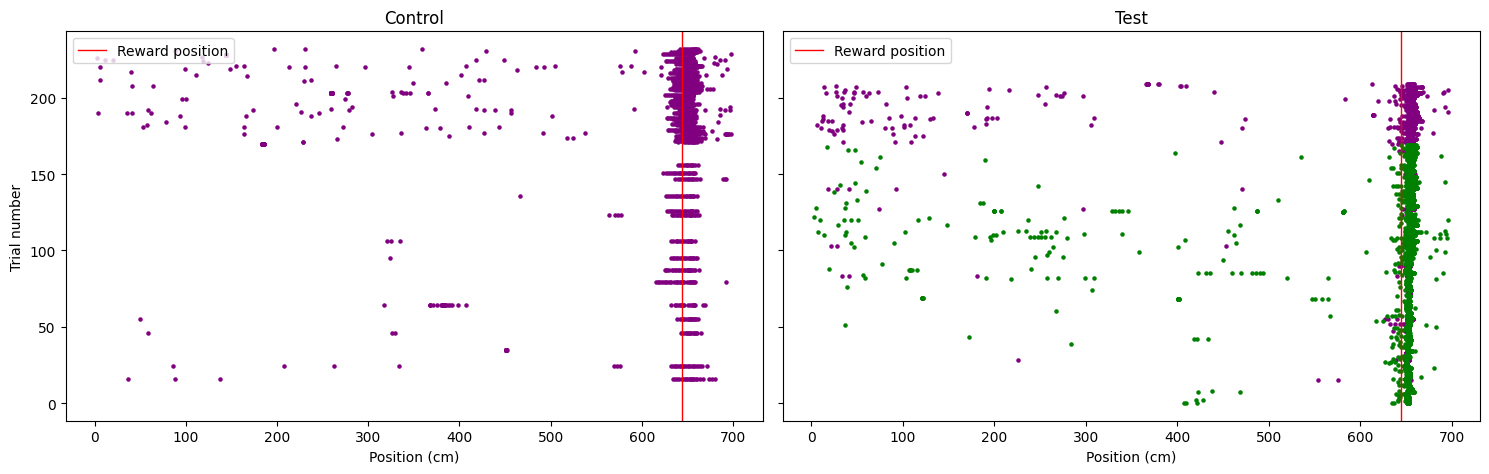

10


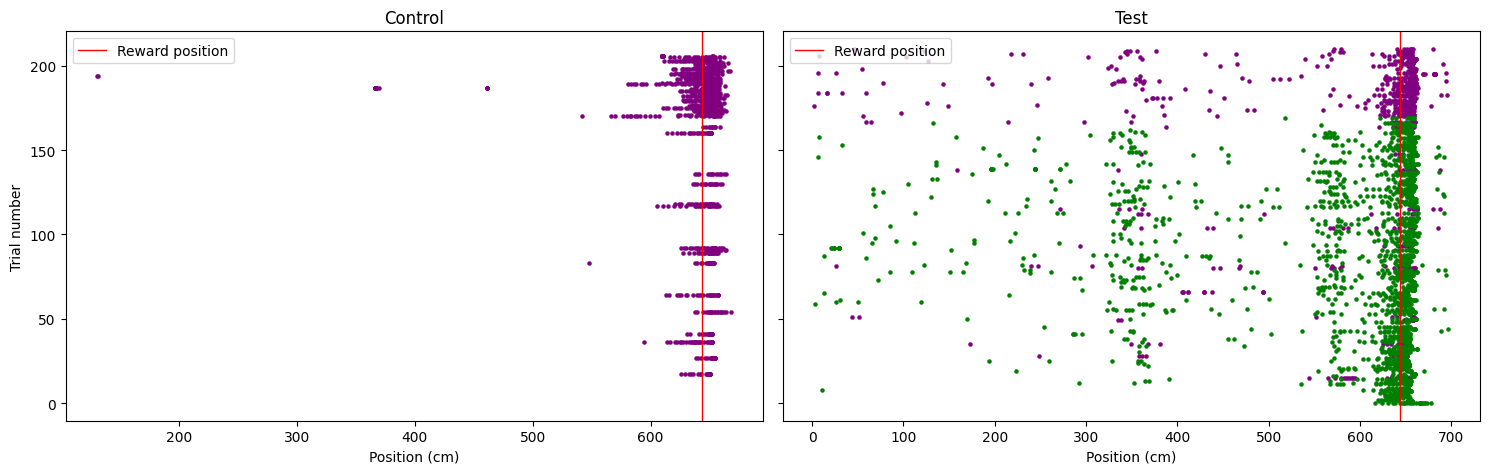

11


KeyError: 11

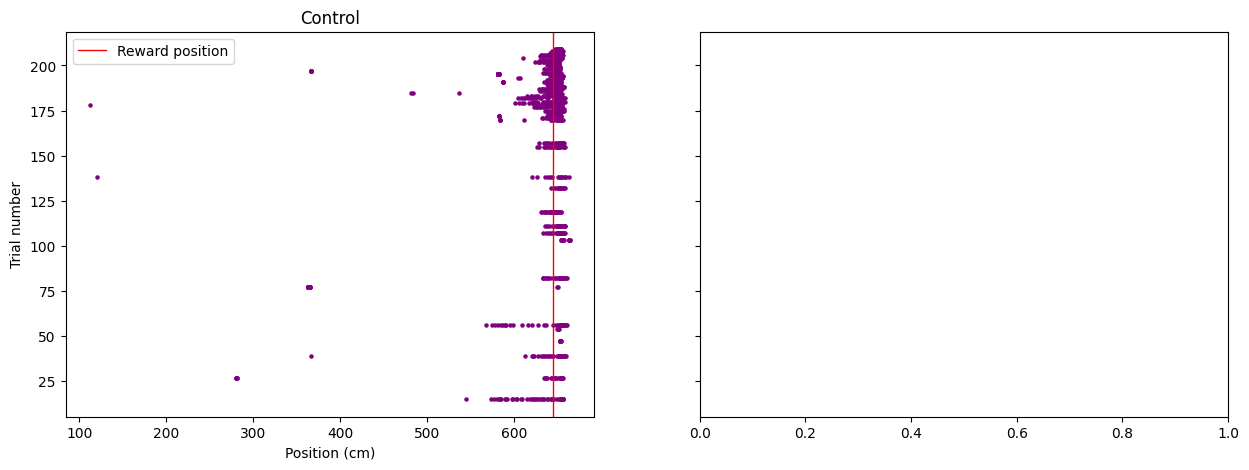

In [61]:
for ani in data_ctl:
    print(ani)
    plot_lick_data(ani)

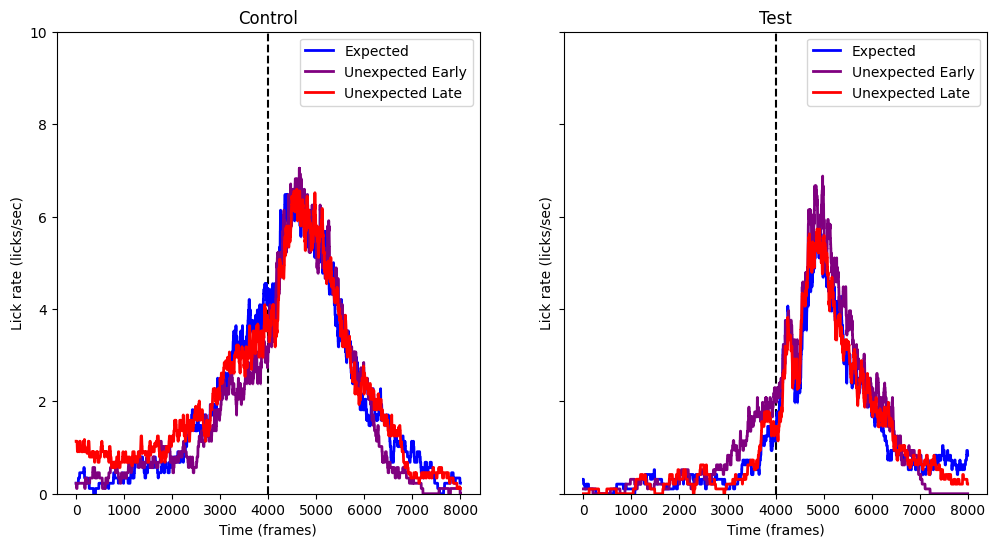

In [44]:
# Lick Rate --- nondonwsampled 
#ctl
animal_ctl = [1,3,4,6,7,8,9,10,11,12,13]
unexp_data = {}
for ani in animal_ctl:
    unexp_data[ani] = []
    for trial in data_ctl_full[ani]['unpred_trials']['gr_2'][:4]:
        unexp_data[ani].append(lick_rate_ctl[ani][range(data_ctl_full[ani]['reward_indices'][trial]-4000, data_ctl_full[ani]['reward_indices'][trial]+4000)])
exp_data = {}
for ani in animal_ctl:
    exp_data[ani] = []
    for trial in data_ctl_full[ani]['unpred_trials']['gr_2'][6:10]:
        exp_data[ani].append(lick_rate_ctl[ani][range(data_ctl_full[ani]['reward_indices'][trial-1]-4000, data_ctl_full[ani]['reward_indices'][trial-1]+4000)])
unexp_late_data = {}
for ani in animal_ctl:
    unexp_late_data[ani] = []
    for trial in data_ctl_full[ani]['unpred_trials']['gr_2'][6:10]:
        unexp_late_data[ani].append(lick_rate_ctl[ani][range(data_ctl_full[ani]['reward_indices'][trial]-4000, data_ctl_full[ani]['reward_indices'][trial]+4000)])

exp_color = 'blue'
unexp_color = 'purple'
unexp_late_color = 'red'

# control
unexp_early = np.mean(np.stack([unexp_data[ani] for ani in animal_ctl]),axis = 1)
exp = np.mean(np.stack([exp_data[ani] for ani in animal_ctl]),axis = 1)
unexp_late = np.mean(np.stack([unexp_late_data[ani] for ani in animal_ctl]),axis = 1)

x_vals = np.arange(exp.shape[1])
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
axes[0].set_ylim([0,10])
axes[0].axvline(4000, linestyle='--', color='k')
af.plot_shaded_error(axes[0], x_vals, exp, color=exp_color, label='Expected')
af.plot_shaded_error(axes[0], x_vals, unexp_early, color=unexp_color, label='Unexpected Early')
af.plot_shaded_error(axes[0], x_vals, unexp_late, color=unexp_late_color, label='Unexpected Late', style='smooth')
axes[0].set_title('Control')
axes[0].set_xlabel('Time (frames)')
axes[0].set_ylabel('Lick rate (licks/sec)')
axes[0].legend()

# tst
animal_tst = [0,1,2,3,4,5,6,7,8,9,10,12]
unexp_data = {}
for ani in animal_tst:
    unexp_data[ani] = []
    for trial in data_tst_full[ani]['unpred_trials']['gr_2'][:4]:
        unexp_data[ani].append(lick_rate_tst[ani][range(data_tst_full[ani]['reward_indices'][trial]-4000, data_tst_full[ani]['reward_indices'][trial]+4000)])
exp_data = {}
for ani in animal_tst:
    exp_data[ani] = []
    for trial in data_tst_full[ani]['unpred_trials']['gr_2'][6:10]:
        exp_data[ani].append(lick_rate_tst[ani][range(data_tst_full[ani]['reward_indices'][trial-1]-4000, data_tst_full[ani]['reward_indices'][trial-1]+4000)])
unexp_late_data = {}
for ani in animal_tst:
    unexp_late_data[ani] = []
    for trial in data_tst_full[ani]['unpred_trials']['gr_2'][6:10]:
        unexp_late_data[ani].append(lick_rate_tst[ani][range(data_tst_full[ani]['reward_indices'][trial]-4000, data_tst_full[ani]['reward_indices'][trial]+4000)])

exp_color = 'blue'
unexp_color = 'purple'
unexp_late_color = 'red'

# test
unexp_early = np.mean(np.stack([unexp_data[ani] for ani in animal_tst]), axis=1)
exp = np.mean(np.stack([exp_data[ani] for ani in animal_tst]), axis=1)
unexp_late = np.mean(np.stack([unexp_late_data[ani] for ani in animal_tst]), axis=1)

x_vals = np.arange(exp.shape[1])
axes[1].set_ylim([0,10])
axes[1].axvline(4000, linestyle='--', color='k')
af.plot_shaded_error(axes[1], x_vals, exp, color=exp_color, label='Expected')
af.plot_shaded_error(axes[1], x_vals, unexp_early, color=unexp_color, label='Unexpected Early')
af.plot_shaded_error(axes[1], x_vals, unexp_late, color=unexp_late_color, label='Unexpected Late', style='smooth')
axes[1].set_title('Test')
axes[1].set_xlabel('Time (frames)')
axes[1].set_ylabel('Lick rate (licks/sec)')
axes[1].legend()


In [ ]:
# rewrad location in the corridor
for ani in data_ctl_full:
    print(ani,data_ctl_full[ani]['position'][data_ctl_full[ani]['reward_indices']])


0 [4.6138792  4.61355066 4.61585093 4.61256504 4.61749411 4.61650801
 4.6148653  4.61289358 4.61847973 4.61585093 4.61289358 4.61552238
 4.61519384 0.11370745 4.61420774 4.61519384 4.61322212 4.61256504
 4.6148653  4.61782265 4.61650801 4.61289358 4.61782265 4.6138792
 4.61617947 4.61519384 4.61420774 4.61913681 4.61355066 4.61847973
 4.61420774 4.61322212 4.61420774 4.61519384 4.61683655 4.61716557
 4.61716557 4.61420774 4.61519384 4.61585093 4.61585093 4.61880827
 4.61552238 2.61402702 4.61322212 4.61617947 4.61420774 4.61552238
 4.61322212 4.61716557 4.61782265 4.61946535 4.61847973 4.62012291
 4.61749411 4.61420774 4.61420774 4.61453676 4.61683655 4.61420774
 4.61782265 4.6138792  4.61585093 4.61749411 4.61617947 3.58438063
 4.61289358 4.61420774 4.6138792  4.61552238 4.61880827 4.61683655
 4.61585093 4.61519384 4.61552238 4.61519384 4.61716557 4.61847973
 4.6138792  4.61782265 4.61782265 4.61815119 4.61453676 4.61322212
 4.61617947 4.61190796 4.61289358 4.61453676 4.61453676 4.617

IndexError: index 6355075 is out of bounds for axis 0 with size 6338800

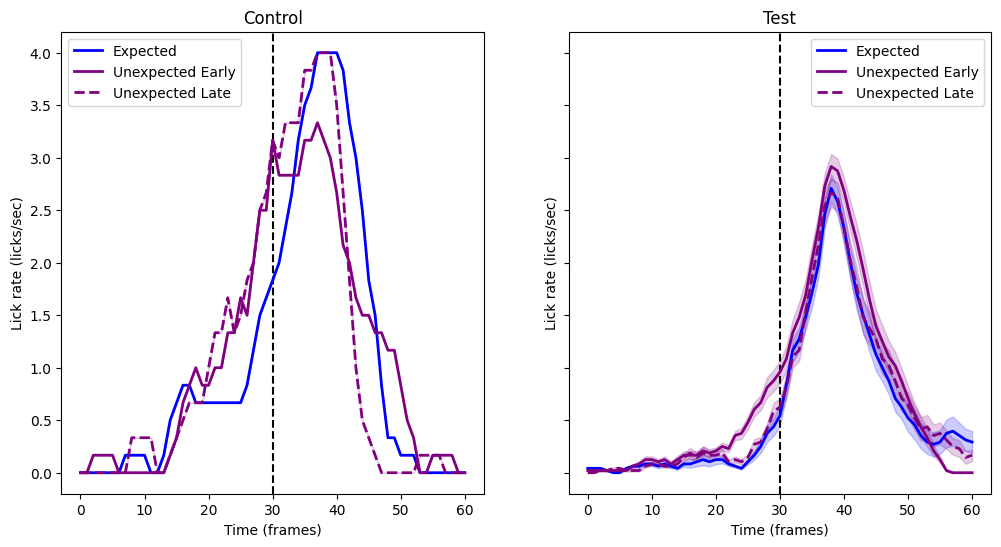

In [58]:
#ctl --- downsampled lick rate

animal_ctl = [13]
unexp_data = {}
for ani in animal_ctl:
    unexp_data[ani] = []
    for trial in data_ctl[ani]['unpred_trials']['gr_2'][:6]:
        unexp_data[ani].append(lick_rate_ctl_ds[ani][range(data_ctl[ani]['reward_indices'][trial]-30,data_ctl[ani]['reward_indices'][trial]+31)])
exp_data = {}
for ani in animal_ctl:
    exp_data[ani] = []
    for trial in data_ctl[ani]['unpred_trials']['gr_2'][:6]:
        exp_data[ani].append(lick_rate_ctl_ds[ani][range(data_ctl[ani]['reward_indices'][trial-1]-30,data_ctl[ani]['reward_indices'][trial-1]+31)])
unexp_late_data = {}
for ani in animal_ctl:
    unexp_late_data[ani] = []
    for trial in data_ctl[ani]['unpred_trials']['gr_2'][6:12]:
        unexp_late_data[ani].append(lick_rate_ctl_ds[ani][range(data_ctl[ani]['reward_indices'][trial]-30,data_ctl[ani]['reward_indices'][trial]+31)])

exp_color = 'blue'
unexp_color = 'purple'
# control
unexp_early = np.mean(np.stack([unexp_data[ani] for ani in animal_ctl]),axis = 1)
exp = np.mean(np.stack([exp_data[ani] for ani in animal_ctl]),axis = 1)
unexp_late = np.mean(np.stack([unexp_late_data[ani] for ani in animal_ctl]),axis = 1)

x_vals = np.arange(exp.shape[1])
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
# axes[0].set_ylim([0,6])
axes[0].axvline(30, linestyle='--', color='k')
af.plot_shaded_error(axes[0], x_vals, exp, color=exp_color, label='Expected')
af.plot_shaded_error(axes[0], x_vals, unexp_early, color=unexp_color, label='Unexpected Early')
af.plot_shaded_error(axes[0], x_vals, unexp_late, color=unexp_color, label='Unexpected Late', style='dash')
axes[0].set_title('Control')
axes[0].set_xlabel('Time (frames)')
axes[0].set_ylabel('Lick rate (licks/sec)')
axes[0].legend()

# tst
unexp_data = {}
for ani in animal_tst:
    unexp_data[ani] = []
    for trial in data_tst[ani]['unpred_trials']['gr_2'][:4]:
        unexp_data[ani].append(lick_rate_tst_ds[ani][range(data_tst[ani]['reward_indices'][trial]-30,data_tst[ani]['reward_indices'][trial]+31)])
exp_data = {}
for ani in animal_tst:
    exp_data[ani] = []
    for trial in data_tst[ani]['unpred_trials']['gr_2'][6:10]:
        exp_data[ani].append(lick_rate_tst_ds[ani][range(data_tst[ani]['reward_indices'][trial-1]-30,data_tst[ani]['reward_indices'][trial-1]+31)])
unexp_late_data = {}
for ani in animal_tst:
    unexp_late_data[ani] = []
    for trial in data_tst[ani]['unpred_trials']['gr_2'][6:10]:
        unexp_late_data[ani].append(lick_rate_tst_ds[ani][range(data_tst[ani]['reward_indices'][trial]-30,data_tst[ani]['reward_indices'][trial]+31)])
exp_color = 'blue'
unexp_color = 'purple'

# test
unexp_early = np.mean(np.stack([unexp_data[ani] for ani in animal_tst]), axis=1)
exp = np.mean(np.stack([exp_data[ani] for ani in animal_tst]), axis=1)
unexp_late = np.mean(np.stack([unexp_late_data[ani] for ani in animal_tst]), axis=1)

x_vals = np.arange(exp.shape[1])
axes[1].axvline(30, linestyle='--', color='k')
af.plot_shaded_error(axes[1], x_vals, exp, color=exp_color, label='Expected')
af.plot_shaded_error(axes[1], x_vals, unexp_early, color=unexp_color, label='Unexpected Early')
af.plot_shaded_error(axes[1], x_vals, unexp_late, color=unexp_color, label='Unexpected Late', style='dash')
axes[1].set_title('Test')
axes[1].set_xlabel('Time (frames)')
axes[1].set_ylabel('Lick rate (licks/sec)')
axes[1].legend()

In [ ]:
# three points plot function
def compute_unexp_exp_rw(data_group, group_name):
    unexp_rw = {}
    exp_rw = {}
    for ani in data_group:
        unexp_rw[ani] = []
        exp_rw[ani] = []
        for trial in data_group[ani]['unpred_trials']['gr_2']:
            unexp_rw[ani].append(data_group[ani]['reward_indices'][trial])
        for trial in data_group[ani]['unpred_trials']['gr_2']:
            exp_rw[ani].append(data_group[ani]['reward_indices'][trial - 1])
    return unexp_rw, exp_rw


def three_points_plot(ctl_animals,tst_animals):

    # compute reward indices
    unexp_rw_ctl, exp_rw_ctl = compute_unexp_exp_rw(data_ctl, 'control')
    unexp_rw_tst, exp_rw_tst = compute_unexp_exp_rw(data_tst, 'test')


    # ==========================
    # PLOT CONTROL GROUP
    # ==========================
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    ax = axes.flatten()


    ctl_animals = ctl_animals  
    tst_animals = tst_animals  


    # -------- CONTROL --------
    results_ctl = []
    for ani in ctl_animals:
        arr = lick_record_ctl[ani][exp_rw_ctl[ani][6:10]]
        first_lick_exp_B = [30 - np.where(row == 1)[0][0] if np.any(row == 1) else -30 for row in arr]

        arr = lick_record_ctl[ani][unexp_rw_ctl[ani][:4]]
        first_lick_unexp_X = [30 - np.where(row == 1)[0][0] if np.any(row == 1) else -30 for row in arr]

        arr = lick_record_ctl[ani][unexp_rw_ctl[ani][6:10]]
        first_lick_exp_X = [30 - np.where(row == 1)[0][0] if np.any(row == 1) else -30 for row in arr]

        results_ctl.append([
            np.mean(first_lick_exp_B),
            np.mean(first_lick_unexp_X),
            np.mean(first_lick_exp_X)
        ])
    results_ctl = np.array(results_ctl) / 7.5

    colors = ['gray', 'red', 'blue']
    x_positions = [1, 2, 3]

    for i, xpos in enumerate(x_positions):
        ax[0].scatter(np.full(results_ctl.shape[0], xpos),
                    results_ctl[:, i],
                    facecolors='none', edgecolors=colors[i],
                    s=60, linewidth=1.5, zorder=3)
    for animal in results_ctl:
        ax[0].plot(x_positions, animal, color='gray', linewidth=1, alpha=0.8, zorder=2)

    for i in range(results_ctl.shape[1]):
        mean_val = np.mean(results_ctl[:, i])
        ax[0].hlines(mean_val, i + 0.8, i + 1.2, color='black', linewidth=2)

    pairs = [(0, 1), (0, 2), (1, 2)]
    pvals_ctl = [wilcoxon(results_ctl[:, i], results_ctl[:, j])[1] for (i, j) in pairs]

    ax[0].set_xticks([1, 2, 3])
    ax[0].set_ylim([-4, 4])
    ax[0].axhline(0,c='black')
    ax[0].set_xticklabels(['Expected', 'Unexp Early', 'Unexp Late'])
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].text(1.5, np.max(results_ctl) + 0.1, f"P={pvals_ctl[0]:.3f}", ha='center')
    ax[0].text(2.5, np.max(results_ctl) + 0.1, f"P={pvals_ctl[2]:.3f}", ha='center')
    ax[0].set_ylabel('Latency (s)')
    ax[0].set_title('Lick Latency (Control)')


    # -------- TEST --------
    results_tst = []
    for ani in tst_animals:
        arr = lick_record_tst[ani][exp_rw_tst[ani][6:10]]
        first_lick_exp_B = [30 - np.where(row == 1)[0][0] if np.any(row == 1) else -30 for row in arr]

        arr = lick_record_tst[ani][unexp_rw_tst[ani][:4]]
        first_lick_unexp_X = [30 - np.where(row == 1)[0][0] if np.any(row == 1) else -30 for row in arr]

        arr = lick_record_tst[ani][unexp_rw_tst[ani][6:10]]
        first_lick_exp_X = [30 - np.where(row == 1)[0][0] if np.any(row == 1) else -30 for row in arr]

        results_tst.append([
            np.mean(first_lick_exp_B),
            np.mean(first_lick_unexp_X),
            np.mean(first_lick_exp_X)
        ])
    results_tst = np.array(results_tst) / 7.5

    for i, xpos in enumerate(x_positions):
        ax[1].scatter(np.full(results_tst.shape[0], xpos),
                    results_tst[:, i],
                    facecolors='none', edgecolors=colors[i],
                    s=60, linewidth=1.5, zorder=3)
    for animal in results_tst:
        ax[1].plot(x_positions, animal, color='gray', linewidth=1, alpha=0.8, zorder=2)

    for i in range(results_tst.shape[1]):
        mean_val = np.mean(results_tst[:, i])
        ax[1].hlines(mean_val, i + 0.8, i + 1.2, color='black', linewidth=2)

    pvals_tst = [wilcoxon(results_tst[:, i], results_tst[:, j])[1] for (i, j) in pairs]

    ax[1].set_xticks([1, 2, 3])
    ax[1].set_ylim([-4, 4])
    ax[1].axhline(0,c='black')
    ax[1].set_xticklabels(['Expected', 'Unexp Early', 'Unexp Late'])
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].text(1.5, np.max(results_tst) + 0.1, f"P={pvals_tst[0]:.3f}", ha='center')
    ax[1].text(2.5, np.max(results_tst) + 0.1, f"P={pvals_tst[2]:.3f}", ha='center')
    ax[1].set_ylabel('Latency (s)')
    ax[1].set_title('Lick Latency (Test)')

    plt.tight_layout()
    plt.show()


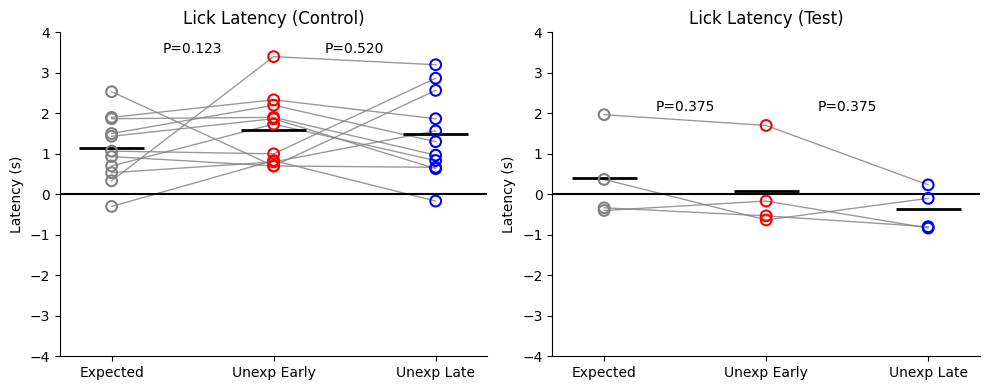

In [242]:
three_points_plot([0,2,3,4,6,8,9,10,11,12,13],[1,3,4,5])